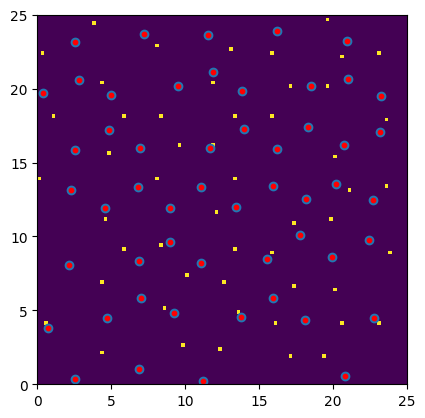

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from ase import io

from src.utils import vec2box, box2vec

path = "/mnt/e/simu_data/bulk-Hup-Data/20240923-bulk-Hup-test/afm/icehupT160_2000000_0_12_0/0.png"
struct = "/mnt/e/simu_data/bulk-Hup-Data/20240923-bulk-Hup-test/label/icehupT160_2000000_0_12_0.poscar"
from PIL import Image

img = Image.open(path).convert('L')
img = img.transpose(method=Image.Transpose.ROTATE_270)
# img = img.transpose(method=Image.Transpose.FLIP_LEFT_RIGHT)

AT = io.read(struct)

cell = AT.cell.array

X = AT.cell.array[0,0]
Y = AT.cell.array[1,1]

AT = AT[AT.numbers == 8].positions

box = vec2box(AT @ np.linalg.inv(cell), box_size=(100, 100, 1))
conf, rs, *_ = box2vec(box[...,0], box[..., 1:4])
rs = rs @ cell
plt.scatter(rs[...,0], rs[...,1])
plt.scatter(AT[:, 0], AT[:, 1], c='r', s=10)
plt.imshow(box[:,:,0,0] + img, extent=[0, X, 0, Y]) # Y, X
